In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

# Data Import and Cleanup

In [17]:
time_tracking = pd.read_csv('time_tracking.csv')

# clean up
time_tracking = time_tracking[time_tracking['state'].str.lower() == 'stopped']
time_tracking['datetime'] = time_tracking['datetime'].astype('datetime64')
time_tracking = time_tracking[['activity','datetime', 'hours', 'client', 'project']]

time_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8186 entries, 1 to 16371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   activity  8186 non-null   object        
 1   datetime  8186 non-null   datetime64[ns]
 2   hours     8186 non-null   float64       
 3   client    2115 non-null   object        
 4   project   2115 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 383.7+ KB


In [18]:
time_tracking.head()

,activity,datetime,hours,client,project
1,Client Production,2016-11-08 14:51:00,1.58,NaN,NaN
3,Client Production,2016-11-08 16:40:00,1.53,NaN,NaN
5,Client Production,2016-11-09 13:18:00,1.50,NaN,NaN
7,Client Production,2016-11-09 15:18:00,1.55,NaN,NaN
9,Client Production,2016-11-11 13:06:00,1.50,NaN,NaN


# Exploratory Data Analysis

In [19]:
total_hours = time_tracking['hours'].sum()
print(total_hours)

8244.09


In [20]:
business_activities = ['Client Production', 'Meridian Quake', 'Spec', 'Admin', 'Sound Design', 'Engineering', 
                       'Practicing', 'Edu Data Science', 'Programming Portfolio', 'Brilliant', 'Employer Hunt']
time_tracking_business = time_tracking[time_tracking['activity'].isin(business_activities)]

In [21]:
activity_total_hours = time_tracking_business.groupby('activity').hours.sum().reset_index(name='total_hours')
activity_total_hours = activity_total_hours.sort_values(by='total_hours', ascending=False)
activity_total_hours.head(20)

,activity,total_hours
2,Client Production,4151.00
6,Meridian Quake,1555.38
10,Spec,1049.80
0,Admin,716.36
9,Sound Design,230.36
5,Engineering,224.02
3,Edu Data Science,145.38
7,Practicing,122.17
8,Programming Portfolio,19.46
1,Brilliant,13.06


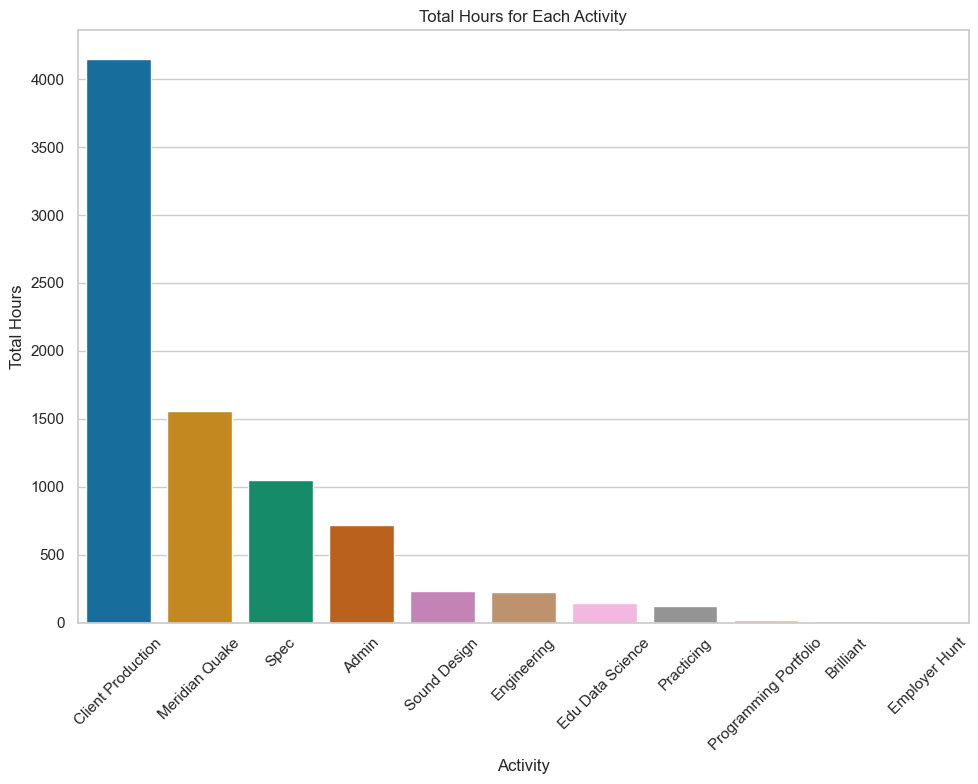

In [22]:
# create figure
plt.figure(figsize=(10,8))
ax = plt.subplot()

# Set the style of seaborn
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette
palette = sns.color_palette("colorblind", n_colors=len(activity_total_hours))

# Create the bar plot with the chosen palette
sns.barplot(x='activity', y='total_hours', data=activity_total_hours, palette=palette)
plt.xticks(rotation=45)
plt.xlabel('Activity')
plt.ylabel('Total Hours')
plt.title('Total Hours for Each Activity')
plt.tight_layout()  # Ensures that labels and titles fit within the plot area
plt.show()